## Ejemplo para mostrar un shape en un mapa, con geopandas, basemap y contextily (para el fondo)

In [8]:
import numpy as np # para operaciones numericas
import matplotlib.pyplot as plt # libreria de graficacion
from mpl_toolkits.basemap import Basemap # para hacer el canvas de los mapas, esta parte puede ser con cartopy
import geopandas as gpd # para manejo de informacion geoespacial con la misma facilidad de pandas
import contextily as ctx # otra libreria geoespacial que sirve para poner fondos a los mapas, tienen muchos proveedores

In [17]:
# Lectura Datos
shape_cuenca = 'Shapes/SanAndres.shp' # La ruta del shape
SanAndres_gp = gpd.read_file(shape_cuenca) # se lee con geopandas

/home/administrador/desarrollo/programador/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: The "url" option is deprecated. Please use the "source" argument instead.
  if __name__ == '__main__':


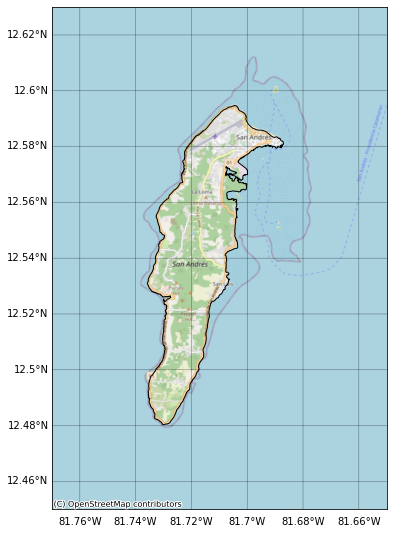

In [33]:
#Grafico 
plt.figure(figsize=(6,10))
ax = plt.subplot(1,1,1)

limites=[-81.77,12.45,-81.65,12.63]
# En la siguiente linea se establece el epsg= 4326, que corresponde al de WGS84, y los limites de la figura
Map = Basemap(epsg =4326, llcrnrlon=limites[0], llcrnrlat=limites[1], urcrnrlon=limites[2],urcrnrlat=limites[-1], resolution='h')

# Se definen los meridianps y paralelos que se muestran en el mapa, y el estilo
Map.drawmeridians(np.arange(-82,-81,0.02), labels=[1, 0, 0, 1],  linewidth=0.5,color='black',fontsize=10)
Map.drawparallels(np.arange(12.4,12.8,0.02), labels=[1, 0, 0, 1],  linewidth=0.5,color='black',fontsize=10)

# Se pone el shape. OJO el shape debe estar en la misma proyeccion que se definio la figura en la linea 8, osea epsg 4326
SanAndres_gp.plot(ax=ax,facecolor='none', edgecolor='black')

# Aqui se agrega el fondito. se define que en el mismo crs que el shape
ctx.add_basemap(ax, crs = SanAndres_gp.crs, url = ctx.providers.OpenStreetMap.Mapnik)#,zoom = 15)

# Ya aca se guarda el mapa
plt.savefig('MuestraPixeles_SanAndres.png',dpi=150,bbox_inches='tight')